Sample of DataFrame that only includes the rows where df's Walk Score is > 85


    Census Tract  Walk Score
1          20100         100
14         60300          91
15         60500          88
16         70300          91
17         70500          88
19         70800          88
20         70900          89
22         80400          86
24         80700          86
25         80900          86


walkScoreNumpy[0:16:1, 0] slices the walkScoreNumpy array into 
a one dimensional array with indexes 0-16 in Census Tract


[ 20100  60300  60500  70300  70500  70800  70900  80400  80700  80900
  90200  90300 111500 140800 220600 445500]


np.delete(walkScoreTractSlice, 15) deletes index 15 in walkScoreTractSlice
because the tract number was not a City of Pittsburgh


[ 20100  60300  60500  70300  70500  70800  70900  80400  80700  80900
  90200  90300 111500 140800 220600]


walkScoreNumpy[0:16:1, 1] slices the walkScoreNumpy array into 
a one dimensional array with indexes 0-16 in Walk Sco

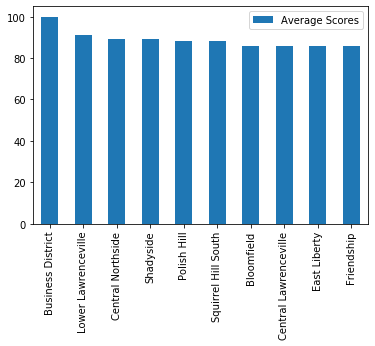

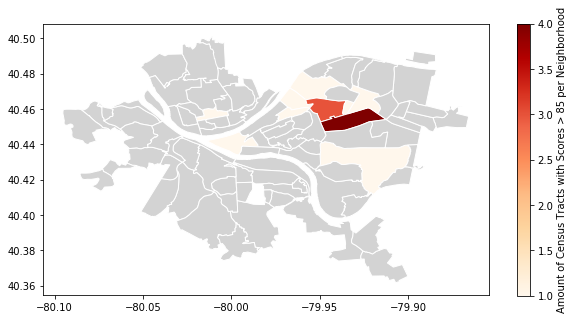

In [4]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# DataFrame that uses data from https://data.wprdc.org/dataset/allegheny-county-walk-scores
df = pd.read_csv("pghWalkability.csv",
                           parse_dates=True)

walkScore = df[df["Walk Score"] > 85]

print("Sample of DataFrame that only includes the rows where df's Walk Score is > 85")
print("\n")
print(walkScore.head(10))
print("\n")

# pd.DataFrame(walkScore).to_numpy() converts a DataFrame into a numpy array
walkScoreNumpy = pd.DataFrame(walkScore).to_numpy()

# DataFrame that uses data from https://data.wprdc.org/dataset/2010-census-tracts
df2 = pd.read_csv("2010_Census_Tracts.csv",
                           parse_dates=True)

# df2[["tractce10","hood"]].to_numpy() converts the sliced DataFrame into a numpy array
tractNumpy= df2[["tractce10","hood"]].to_numpy()

walkScoreTractSlice = walkScoreNumpy[0:16:1, 0]

print("""walkScoreNumpy[0:16:1, 0] slices the walkScoreNumpy array into 
a one dimensional array with indexes 0-16 in Census Tract""")
print("\n")
print(walkScoreTractSlice)
print("\n")

walkScoreTractSlice = np.delete(walkScoreTractSlice, 15)

print("""np.delete(walkScoreTractSlice, 15) deletes index 15 in walkScoreTractSlice
because the tract number was not a City of Pittsburgh""")
print("\n")
print(walkScoreTractSlice)
print("\n")

walkScoreSlice = walkScoreNumpy[0:16:1, 1]

print("""walkScoreNumpy[0:16:1, 1] slices the walkScoreNumpy array into 
a one dimensional array with indexes 0-16 in Walk Score""")
print("\n")
print(walkScoreSlice)
print("\n")

walkScoreSlice = np.delete(walkScoreSlice, 15)

print("""np.delete(walkScoreSlice, 15) deletes index 15 in walkScoreSlice 
because the associated tract number was not a City of Pittsburgh""")
print("\n")
print(walkScoreSlice)
print("\n")

# tractNumpy[0:138:1, 0] slices the tractNumpy array into a one dimensional array with indexes 0-138 in tractce10
tractSlice = tractNumpy[0:138:1, 0]

# tractNumpy[0:138:1, 1] slices the tractNumpy array into a one dimensional array with indexes 0-138 in hood
hoodSlice = tractNumpy[0:138:1, 1]

# In this nested for loop, I am checking to see if the value in walkScoreTractSlice is equal to the value
# in tractSlice. If they are equal, I add an index counter to matchingList. I also formatted the values
# because in tractSlice, any values < 100000 were written like 020100.
matchingList = []
counter = 0

for value in walkScoreTractSlice:
    for value2 in tractSlice:
        if str(value).format(100, "06") == str(value2).format(100, "06"):
            matchingList.append(counter)
            counter += 1
        else:
            counter += 1

    counter = 0

neighborhoods = np.take(hoodSlice, matchingList)

print("""np.take(hoodSlice, matchingList) creates a new numpy array 
that only includes the indices that are found in matchingList""")
print("\n")
print(neighborhoods)
print("\n")

combinedArr = np.column_stack((walkScoreTractSlice, neighborhoods, walkScoreSlice))

print("""np.column_stack((walkScoreTractSlice, neighborhoods, walkScoreSlice))
combines the three, 1D arrays into a 2D array""")
print("\n")
print(combinedArr)
print("\n")

dataset = pd.DataFrame({"Census Tract": combinedArr[:, 0], "Neighborhood": combinedArr[:, 1],
                        "Score": combinedArr[:, 2]})

print("combinedArr is turned back into a Dataframe")
print("\n")
print(dataset)
print("\n")

sorted1 = dataset.sort_values(by=["Score"])

print("DataFrame sorted by Score")
print("\n")
print(sorted1)
print("\n")

sorted2 = dataset.sort_values(by=["Neighborhood"])

print("DataFrame sorted by Neighborhood")
print("\n")
print(sorted2)
print("\n")

# Sliced datasets by Neighborhood
datasetBloomfield = dataset[dataset["Neighborhood"] == "Bloomfield"]
datasetBusDistrict = dataset[dataset["Neighborhood"] == "Central Business District"]
datasetCenLawrenceville = dataset[dataset["Neighborhood"] == "Central Lawrenceville"]
datasetCenNorthside = dataset[dataset["Neighborhood"] == "Central Northside"]
datasetEastLiberty = dataset[dataset["Neighborhood"] == "East Liberty"]
datasetFriendship = dataset[dataset["Neighborhood"] == "Friendship"]
datasetLowerLawrenceville = dataset[dataset["Neighborhood"] == "Lower Lawrenceville"]
datasetPolishHill = dataset[dataset["Neighborhood"] == "Polish Hill"]
datasetShadyside = dataset[dataset["Neighborhood"] == "Shadyside"]
datasetSquirrelHillSouth = dataset[dataset["Neighborhood"] == "Squirrel Hill South"]

print("datasetSquirrelHillSouth")
print("\n")
print(datasetSquirrelHillSouth)
print("\n")

# Add Score values to each Neighborhood's given list
bloomfield = []
for value in datasetBloomfield["Score"]:
    bloomfield.append(value)

busDistrict = []
for value in datasetBusDistrict["Score"]:
    busDistrict.append(value)

cenLawrenceville = []
for value in datasetCenLawrenceville["Score"]:
    cenLawrenceville.append(value)

cenNorthside = []
for value in datasetCenNorthside["Score"]:
    cenNorthside.append(value)

eastLiberty = []
for value in datasetEastLiberty["Score"]:
    eastLiberty.append(value)

friendship = []
for value in datasetFriendship["Score"]:
    friendship.append(value)

lowerLawrenceville = []
for value in datasetLowerLawrenceville["Score"]:
    lowerLawrenceville.append(value)

polishHill = []
for value in datasetPolishHill["Score"]:
    polishHill.append(value)

shadyside = []
for value in datasetShadyside["Score"]:
    shadyside.append(value)

squirrelHillSouth = []
for value in datasetSquirrelHillSouth["Score"]:
    squirrelHillSouth.append(value)

# Calculate average of given list
def Average(x):
    sum = 0
    for element in x:
        sum += element

    return sum / len(x)

# Create and populate averageList
averageList = []
averageList.append(Average(bloomfield))
averageList.append(Average(busDistrict))
averageList.append(Average(cenLawrenceville))
averageList.append(Average(cenNorthside))
averageList.append(Average(eastLiberty))
averageList.append(Average(friendship))
averageList.append(Average(lowerLawrenceville))
averageList.append(Average(polishHill))
averageList.append(Average(shadyside))
averageList.append(Average(squirrelHillSouth))

print("averageList")
print("\n")
print(averageList)
print("\n")

# DataFrame that uses data from averageList
averageScoresDF = pd.DataFrame(averageList, index =["Bloomfield", "Business District",
                                                    "Central Lawrenceville", "Central Northside",
                                                    "East Liberty", "Friendship", "Lower Lawrenceville",
                                                    "Polish Hill", "Shadyside", "Squirrel Hill South"],
                               columns =["Average Scores"])

averageSorted = averageScoresDF.sort_values(by=["Average Scores"], ascending=False)

print("""averageScoresDF.sort_values(by=[\"Average Scores\"], ascending=False)
sorts the DataFrame from highest to lowest score""")
print("\n")
print(averageSorted)
print("\n")
averageSorted.plot(kind="bar");
print("\n")

scores = dataset.groupby("Neighborhood").count()

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods[["hood","geometry"]]

scores_map = neighborhoods.merge(scores, how="left", left_on="hood", right_on="Neighborhood")
scores_map.plot(column="Score",
               cmap="OrRd",
               edgecolor="white",
               legend=True,
               legend_kwds={"label": "Amount of Census Tracts with Scores > 85 per Neighborhood"},
               figsize=(10, 5),
               missing_kwds={"color": "lightgrey"}
               )